<a href="https://colab.research.google.com/github/sarthakkar99/Capstone_peer_to_per_lending/blob/main/peer_to_peer_lending1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# PCA FEATURE SELECTION,RF
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense,Softmax
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

Using TensorFlow backend.


# Data loading


In [ ]:
data=pd.read_excel(r'F:\DOWNLOADS2\uci-credit-approval\uci-credit-approval\crx.data.xlsx')
print(data.head())

  C0     C1     C2 C3 C4 C5 C6    C7 C8 C9  C10 C11 C12  C13  C14 C15
0  b  30.83  0.000  u  g  w  v  1.25  t  t    1   f   g  202    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t  t    6   f   g   43  560   +
2  a   24.5  0.500  u  g  q  h  1.50  t  f    0   f   g  280  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t  t    5   t   g  100    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t  f    0   f   s  120    0   +


In [ ]:
data1=pd.read_csv(r'D:\PYTHON\MACHINE LEARNING USING PYTHON\ML\ITML24\DATABASE\credit1.csv')
print(data1.head())

  checking_balance  months_loan_duration credit_history    purpose  amount  \
0           < 0 DM                     6       critical   radio/tv    1169   
1       1 - 200 DM                    48         repaid   radio/tv    5951   
2          unknown                    12       critical  education    2096   
3           < 0 DM                    42         repaid  furniture    7882   
4           < 0 DM                    24        delayed  car (new)    4870   

  savings_balance employment_length  installment_rate personal_status  \
0         unknown           > 7 yrs                 4     single male   
1        < 100 DM         1 - 4 yrs                 2          female   
2        < 100 DM         4 - 7 yrs                 2     single male   
3        < 100 DM         4 - 7 yrs                 2     single male   
4        < 100 DM         1 - 4 yrs                 3     single male   

  other_debtors  ...                  property age  installment_plan  \
0          none  ...

# label encoding

In [ ]:
label_encoder=LabelEncoder()
print(type(data['C1'].values[0]))
columns=data.columns
for cols in columns:
   # print(cols)
    if(isinstance(data[cols].values[0],str)):
        data[cols]=label_encoder.fit_transform(data[cols].values)

<class 'float'>


In [ ]:
label_encoder=LabelEncoder()
columns=data1.columns
for cols in columns:
   # print(cols)
    if(isinstance(data1[cols].values[0],str)):
        data1[cols]=label_encoder.fit_transform(data1[cols].values)

In [ ]:
print(data.head(100))

    C0     C1      C2  C3  C4  C5  C6     C7  C8  C9  C10  C11  C12  C13  C14  \
0    2  30.83   0.000   2   1  13   8  1.250   1   1    1    0    0  202    0   
1    1  58.67   4.460   2   1  11   4  3.040   1   1    6    0    0   43  560   
2    1   24.5   0.500   2   1  11   4  1.500   1   0    0    0    0  280  824   
3    2  27.83   1.540   2   1  13   8  3.750   1   1    5    1    0  100    3   
4    2  20.17   5.625   2   1  13   8  1.710   1   0    0    0    2  120    0   
..  ..    ...     ...  ..  ..  ..  ..    ...  ..  ..  ...  ...  ...  ...  ...   
95   1  28.58   3.540   2   1   7   1  0.500   1   0    0    1    0  171    0   
96   2     23   0.625   3   3   1   8  0.125   1   0    0    0    0  180    1   
97   2      ?   0.500   2   1   2   1  0.835   1   0    0    1    2  320    0   
98   1   22.5  11.000   3   3  11   8  3.000   1   0    0    1    0  268    0   
99   1   28.5   1.000   2   1  11   8  1.000   1   1    2    1    0  167  500   

    C15  
0     0  
1     0

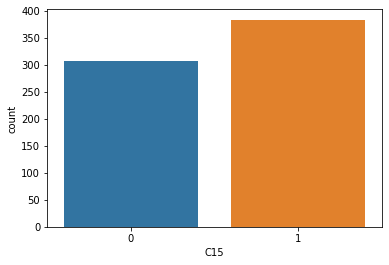

In [ ]:
sns.countplot(data['C15'])

In [ ]:
data1.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,1,6,0,7,1169,4,3,4,3,2,...,2,67,1,1,2,1,1,1,1,1
1,0,48,4,7,5951,2,1,2,1,2,...,2,22,1,1,1,2,1,0,1,1
2,3,12,0,4,2096,2,2,2,3,2,...,2,49,1,1,1,1,2,0,1,3
3,1,42,4,5,7882,2,2,2,3,1,...,0,45,1,0,1,1,2,0,1,1
4,1,24,1,1,4870,2,1,3,3,2,...,3,53,1,0,2,2,2,0,1,1


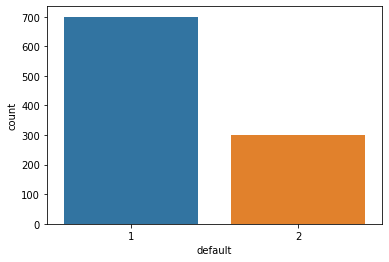

In [ ]:
sns.countplot(data1['default'])

# data cleaning

In [ ]:
print(type(data['C1'].values[86]),data['C1'].values[98])

<class 'str'> 22.5


In [ ]:
data1.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [ ]:
for cols in columns:
    try:
        m=data[cols].mean()
    except:
        for i in range(data[cols].values.shape[0]):
            if isinstance(data[cols].values[i],str):
                data[cols].values[i]=0

In [ ]:
print(data.head(100))

    C0     C1      C2  C3  C4  C5  C6     C7  C8  C9  C10  C11  C12  C13  C14  \
0    2  30.83   0.000   2   1  13   8  1.250   1   1    1    0    0  202    0   
1    1  58.67   4.460   2   1  11   4  3.040   1   1    6    0    0   43  560   
2    1   24.5   0.500   2   1  11   4  1.500   1   0    0    0    0  280  824   
3    2  27.83   1.540   2   1  13   8  3.750   1   1    5    1    0  100    3   
4    2  20.17   5.625   2   1  13   8  1.710   1   0    0    0    2  120    0   
..  ..    ...     ...  ..  ..  ..  ..    ...  ..  ..  ...  ...  ...  ...  ...   
95   1  28.58   3.540   2   1   7   1  0.500   1   0    0    1    0  171    0   
96   2     23   0.625   3   3   1   8  0.125   1   0    0    0    0  180    1   
97   2      0   0.500   2   1   2   1  0.835   1   0    0    1    2  320    0   
98   1   22.5  11.000   3   3  11   8  3.000   1   0    0    1    0  268    0   
99   1   28.5   1.000   2   1  11   8  1.000   1   1    2    1    0  167  500   

    C15  
0     0  
1     0

In [ ]:
x=data.drop(['C15'],axis=1).values
y=data['C15'].values



In [ ]:
x1=data1.drop(['default'],axis=1).values
y1=data1['default'].values


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=False)
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)
print(X_train.shape,X_test.shape)

(552, 15) (138, 15)


In [ ]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(x1,y1,stratify=y1,test_size=0.2,random_state=False)
scaler=StandardScaler()
x_train1=scaler.fit_transform(X_train1)
x_test1=scaler.transform(X_test1)
print(X_train1.shape,X_test1.shape)

(800, 20) (200, 20)


In [ ]:
Y_train.shape

(552,)

In [ ]:
Y_train1.shape

(800,)

0.8840579710144928
[[57 12]
 [ 4 65]]


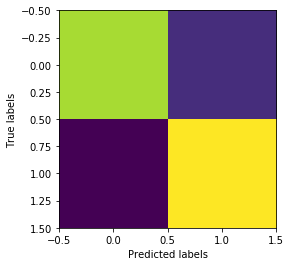

In [ ]:
svm=SVC()
svm.fit(x_train,Y_train)
y_pred=svm.predict(x_test)
print(accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
plt.imshow(confusion_matrix(y_pred,Y_test))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

0.73
[[133  47]
 [  7  13]]


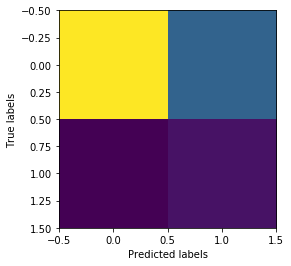

In [ ]:
svm=SVC()
svm.fit(x_train1,Y_train1)
y_pred=svm.predict(x_test1)
print(accuracy_score(y_pred,Y_test1))
print(confusion_matrix(y_pred,Y_test1))
plt.imshow(confusion_matrix(y_pred,Y_test1))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,Y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_pred,Y_test))

0.8768115942028986


C:\Users\SPIRO\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
lr=LogisticRegression()
lr.fit(x_train1,Y_train1)
y_pred=lr.predict(x_test1)
print(accuracy_score(y_pred,Y_test1))

0.715


C:\Users\SPIRO\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8913043478260869
[[52  6]
 [ 9 71]]


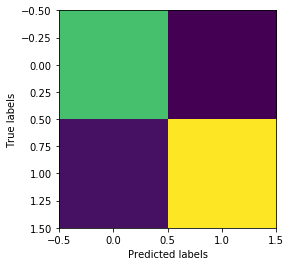

In [ ]:
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,Y_train)
y_pred=kn.predict(x_test)
print(accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
plt.imshow(confusion_matrix(y_pred,Y_test))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
l=[]
Y_pred=[]
def distance(x_test,K):
    l=[]
    for i in range(X_train.shape[0]):
        s=0
        for j,t in zip(x_train[i],x_test):
            s+=(t-j)**2
        l.append((round(np.sqrt(s),2),Y_train[i]))
    l.sort()
    l_min=[]
    #print(l)
    for k in range(K):
        l_min.append(l[k])
    l_lables=[]
    #print(l_min)
    for i in l_min:
     l_lables.append(i[1])
    Y_pred.append(most_frequent(l_lables))
    #Y_pred.append((min(l_min))[1])

def most_frequent(List):
    return max(set(List),key=List.count)
for i in range(X_test.shape[0]):
    distance(x_test[i],5)#change here for different k value for getting better accuracy
#print(Y_pred,Y_test)
print(accuracy_score(Y_pred,Y_test))



0.8913043478260869


In [ ]:
ohe = OneHotEncoder(categories='auto')
Y_cat_train= ohe.fit_transform(Y_train.reshape(-1,1)).toarray()
Y_cat_test= ohe.fit_transform(Y_test.reshape(-1,1)).toarray()
Y_cat_train